# **UTS DEEP LEARNING**
<br>

**NAMA  INDAH GALA PUTRI**
<br>
**NIM  : 09011182126033<br>KELAS : SK 7 A**<br>
  <br>

## **KLASIFIKASI PASIEN PENYAKIT GINJAL MENGGUNAKAN MODEL DEEP LEARNING**

### **IMPORT LIBRARY**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### **IMPORT DATASET**

In [ ]:
# Fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# Features dan Target
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# menggabungkan data (X) dan target (y) dalam satu dataframe
df = pd.concat([X, y], axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Berikut adalah deskripsi singkat untuk setiap variabel dalam dataset:

1. **Age**: Usia pasien dalam tahun.
2. **Blood Pressure**: Tekanan darah pasien dalam mm/Hg.
3. **Specific Gravity**: Kepadatan urin (1.005, 1.010, 1.015, 1.020, 1.025).
4. **Albumin**: Tingkat albumin dalam urin (0, 1, 2, 3, 4, 5).
5. **Sugar**: Kadar gula dalam urin (0, 1, 2, 3, 4, 5).
6. **Red Blood Cells**: Kondisi sel darah merah dalam urin (normal, abnormal).
7. **Pus Cell**: Kondisi sel pus dalam urin (normal, abnormal).
8. **Pus Cell Clumps**: Gumpalan sel pus dalam urin (present, not present).
9. **Bacteria**: Kehadiran bakteri dalam urin (present, not present).
10. **Blood Glucose Random**: Kadar glukosa dalam darah secara acak (mg/dl).
11. **Blood Urea**: Kadar urea dalam darah (mg/dl).
12. **Serum Creatinine**: Kadar kreatinin serum (mg/dl).
13. **Sodium**: Kadar natrium dalam darah (mEq/L).
14. **Potassium**: Kadar kalium dalam darah (mEq/L).
15. **Hemoglobin**: Kadar hemoglobin dalam darah (gram).
16. **Packed Cell Volume**: Volume sel darah yang terpaket.
17. **White Blood Cell Count**: Jumlah sel darah putih (sel/cumm).
18. **Red Blood Cell Count**: Jumlah sel darah merah (juta sel/cmm).
19. **Hypertension**: Status hipertensi pasien (ya, tidak).
20. **Diabetes Mellitus**: Status diabetes pasien (ya, tidak).
21. **Coronary Artery Disease**: Status penyakit arteri koroner (ya, tidak).
22. **Appetite**: Kondisi nafsu makan pasien (baik, buruk).
23. **Pedal Edema**: Kehadiran edema pedal (ya, tidak).
24. **Anemia**: Status anemia pasien (ya, tidak).
25. **Class**: Klasifikasi kondisi ginjal (CKD, tidak CKD).

### **EDA & PREPOCESSING**
EDA adalah pendekatan analisis data yang digunakan untuk merangkum karakteristik dataset, sering kali dengan menggunakan visualisasi grafis. Tujuannya adalah untuk memahami pola, hubungan, dan anomali dalam data sebelum melakukan analisis lebih lanjut atau model prediktif.<br>
Preprocessing adalah langkah-langkah yang diambil untuk menyiapkan data mentah agar siap untuk analisis atau pemodelan. Ini mencakup berbagai teknik untuk membersihkan, mengubah, dan memformat data.

#### **Cek Baris dan Kolom**

In [ ]:
df.shape

(400, 25)

dataset ini memiliki jumlah baris sebanyak 400 baris dan 25 kolom

#### **Cek Info Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

#### **Cek Deskripsi Dataset**

In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


#### **Cek Missing Value**

In [ ]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


terlihat pada dataset terdapat missing value di semua variabel, kecuali variabel class

#### **Handling Missing Value**

In [ ]:
df_clean = df.apply(lambda col: col.fillna(col.mode()[0]))
df_clean.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


untuk mengatasi missing value pada dataset, saya mengganti nilai yang kosong dengan nilai modus. setelah nilai yang kosong diisi dengan nilai modus, terlihat tidak ada lagi data yang kosong.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [ ]:
df_clean

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


#### **Eksplorasi Uniqe Value**

In [ ]:
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    print(f"Kolom: {column}")
    print(f"Jumlah nilai unik: {len(unique_values)}")
    print(f"Nilai unik: {unique_values}")
    print("\n")

Kolom: age
Jumlah nilai unik: 76
Nilai unik: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]


Kolom: bp
Jumlah nilai unik: 10
Nilai unik: [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]


Kolom: sg
Jumlah nilai unik: 5
Nilai unik: [1.02  1.01  1.005 1.015 1.025]


Kolom: al
Jumlah nilai unik: 6
Nilai unik: [1. 4. 2. 3. 0. 5.]


Kolom: su
Jumlah nilai unik: 6
Nilai unik: [0. 3. 4. 1. 2. 5.]


Kolom: rbc
Jumlah nilai unik: 2
Nilai unik: ['normal' 'abnormal']


Kolom: pc
Jumlah nilai unik: 2
Nilai unik: ['normal' 'abnormal']


Kolom: pcc
Jumlah nilai unik: 2
Nilai unik: ['notpresent' 'present']


Kolom: ba
Jumlah nilai unik: 2
Nilai unik: ['notpresent' 'present']


Kolom: bgr
Jumlah nilai unik: 146
Nilai unik: [121.  99. 423. 

dis sini dilakukan eksplorasi data pada dataframe df_clean, dengan tujuan melihat nilai unik di setiap kolom. di sini kita akan mengubah nilai pada kolom dm dan class.

In [ ]:
df_clean["class"] = df_clean["class"].apply(lambda x :"ckd" if x=="ckd\t" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"no" if x=="\tno" else x)

* Membersihkan kolom "class" dengan mengganti setiap nilai "ckd\t" (yang memiliki karakter tab \t di akhir) menjadi "ckd".
* Membersihkan kolom "dm" dengan mengganti setiap nilai "\tno" (yang memiliki karakter tab \t di awal) menjadi "no".

In [ ]:
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    print(f"Kolom: {column}")
    print(f"Jumlah nilai unik: {len(unique_values)}")
    print(f"Nilai unik: {unique_values}")
    print("\n")

Kolom: age
Jumlah nilai unik: 76
Nilai unik: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]


Kolom: bp
Jumlah nilai unik: 10
Nilai unik: [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]


Kolom: sg
Jumlah nilai unik: 5
Nilai unik: [1.02  1.01  1.005 1.015 1.025]


Kolom: al
Jumlah nilai unik: 6
Nilai unik: [1. 4. 2. 3. 0. 5.]


Kolom: su
Jumlah nilai unik: 6
Nilai unik: [0. 3. 4. 1. 2. 5.]


Kolom: rbc
Jumlah nilai unik: 2
Nilai unik: ['normal' 'abnormal']


Kolom: pc
Jumlah nilai unik: 2
Nilai unik: ['normal' 'abnormal']


Kolom: pcc
Jumlah nilai unik: 2
Nilai unik: ['notpresent' 'present']


Kolom: ba
Jumlah nilai unik: 2
Nilai unik: ['notpresent' 'present']


Kolom: bgr
Jumlah nilai unik: 146
Nilai unik: [121.  99. 423. 

setelah di cek kembali tidak ada lagi nilai yang aneh di dataset

#### **Memisahkan kolom-kolom dalam DataFrame**

In [ ]:
cat_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object']
num_cols = [col for col in df_clean.columns if df_clean[col].dtype != 'object']

#### **Visualisasi Data Categorical**

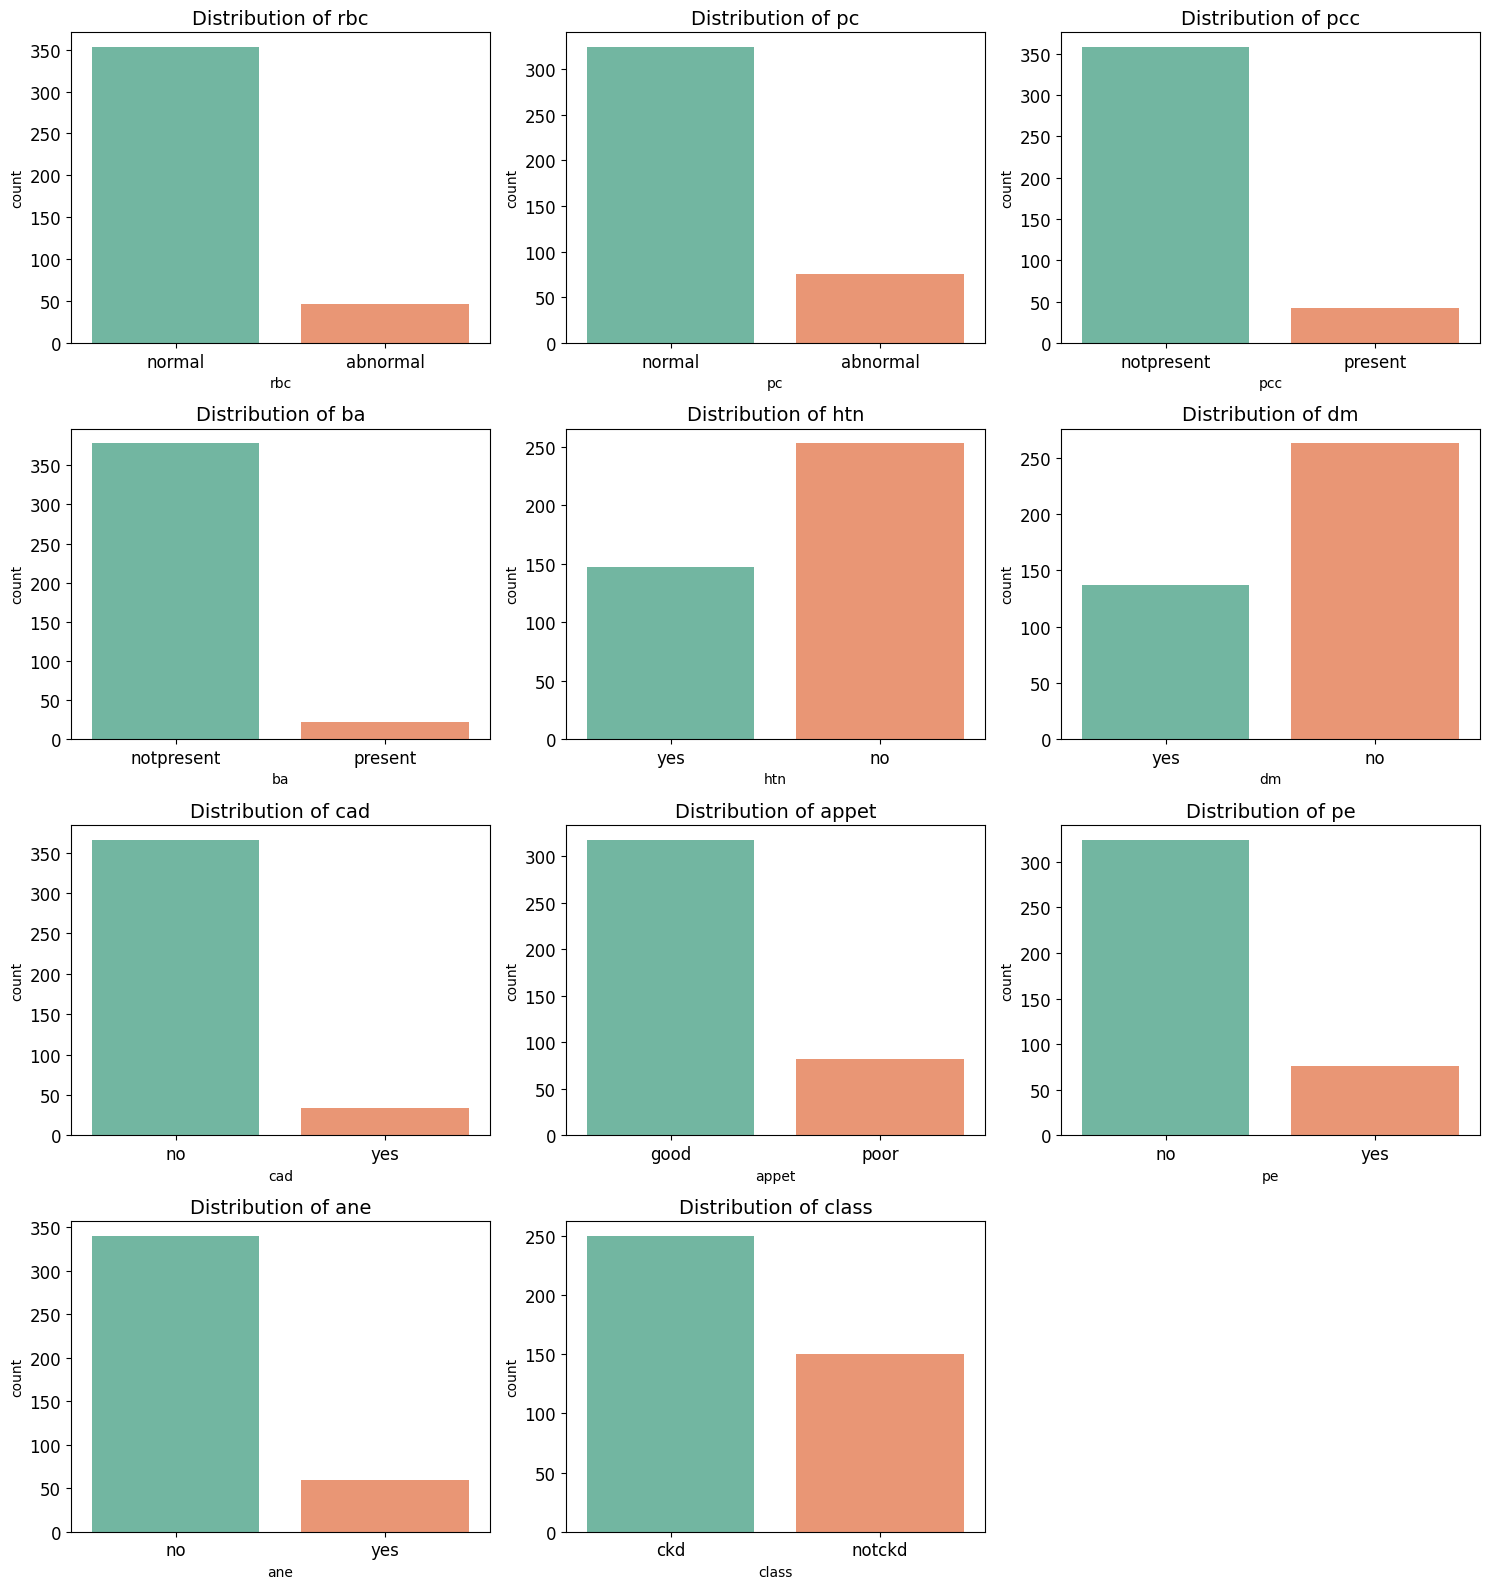

In [ ]:
# Menentukan jumlah kolom grid dan jumlah baris
num_grids = 3  # Jumlah kolom dalam grid
num_rows = (len(cat_cols) // num_grids) + (len(cat_cols) % num_grids > 0)  # Menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(15, num_rows * 4))  # Menyesuaikan tinggi figure dengan jumlah baris

# Looping melalui setiap kolom kategorikal
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, num_grids, i + 1)  # Menentukan grid sesuai jumlah kolom dan baris
    sns.countplot(data=df_clean, x=col, palette="Set2")
    plt.title(f'Distribution of {col}', fontsize=14)  # Mengatur ukuran font judul
    plt.xticks(fontsize=12)  # Mengatur ukuran font untuk sumbu x
    plt.yticks(fontsize=12)  # Mengatur ukuran font untuk sumbu y

plt.tight_layout()
plt.show()

#### **Visualisasi Data Numeric**

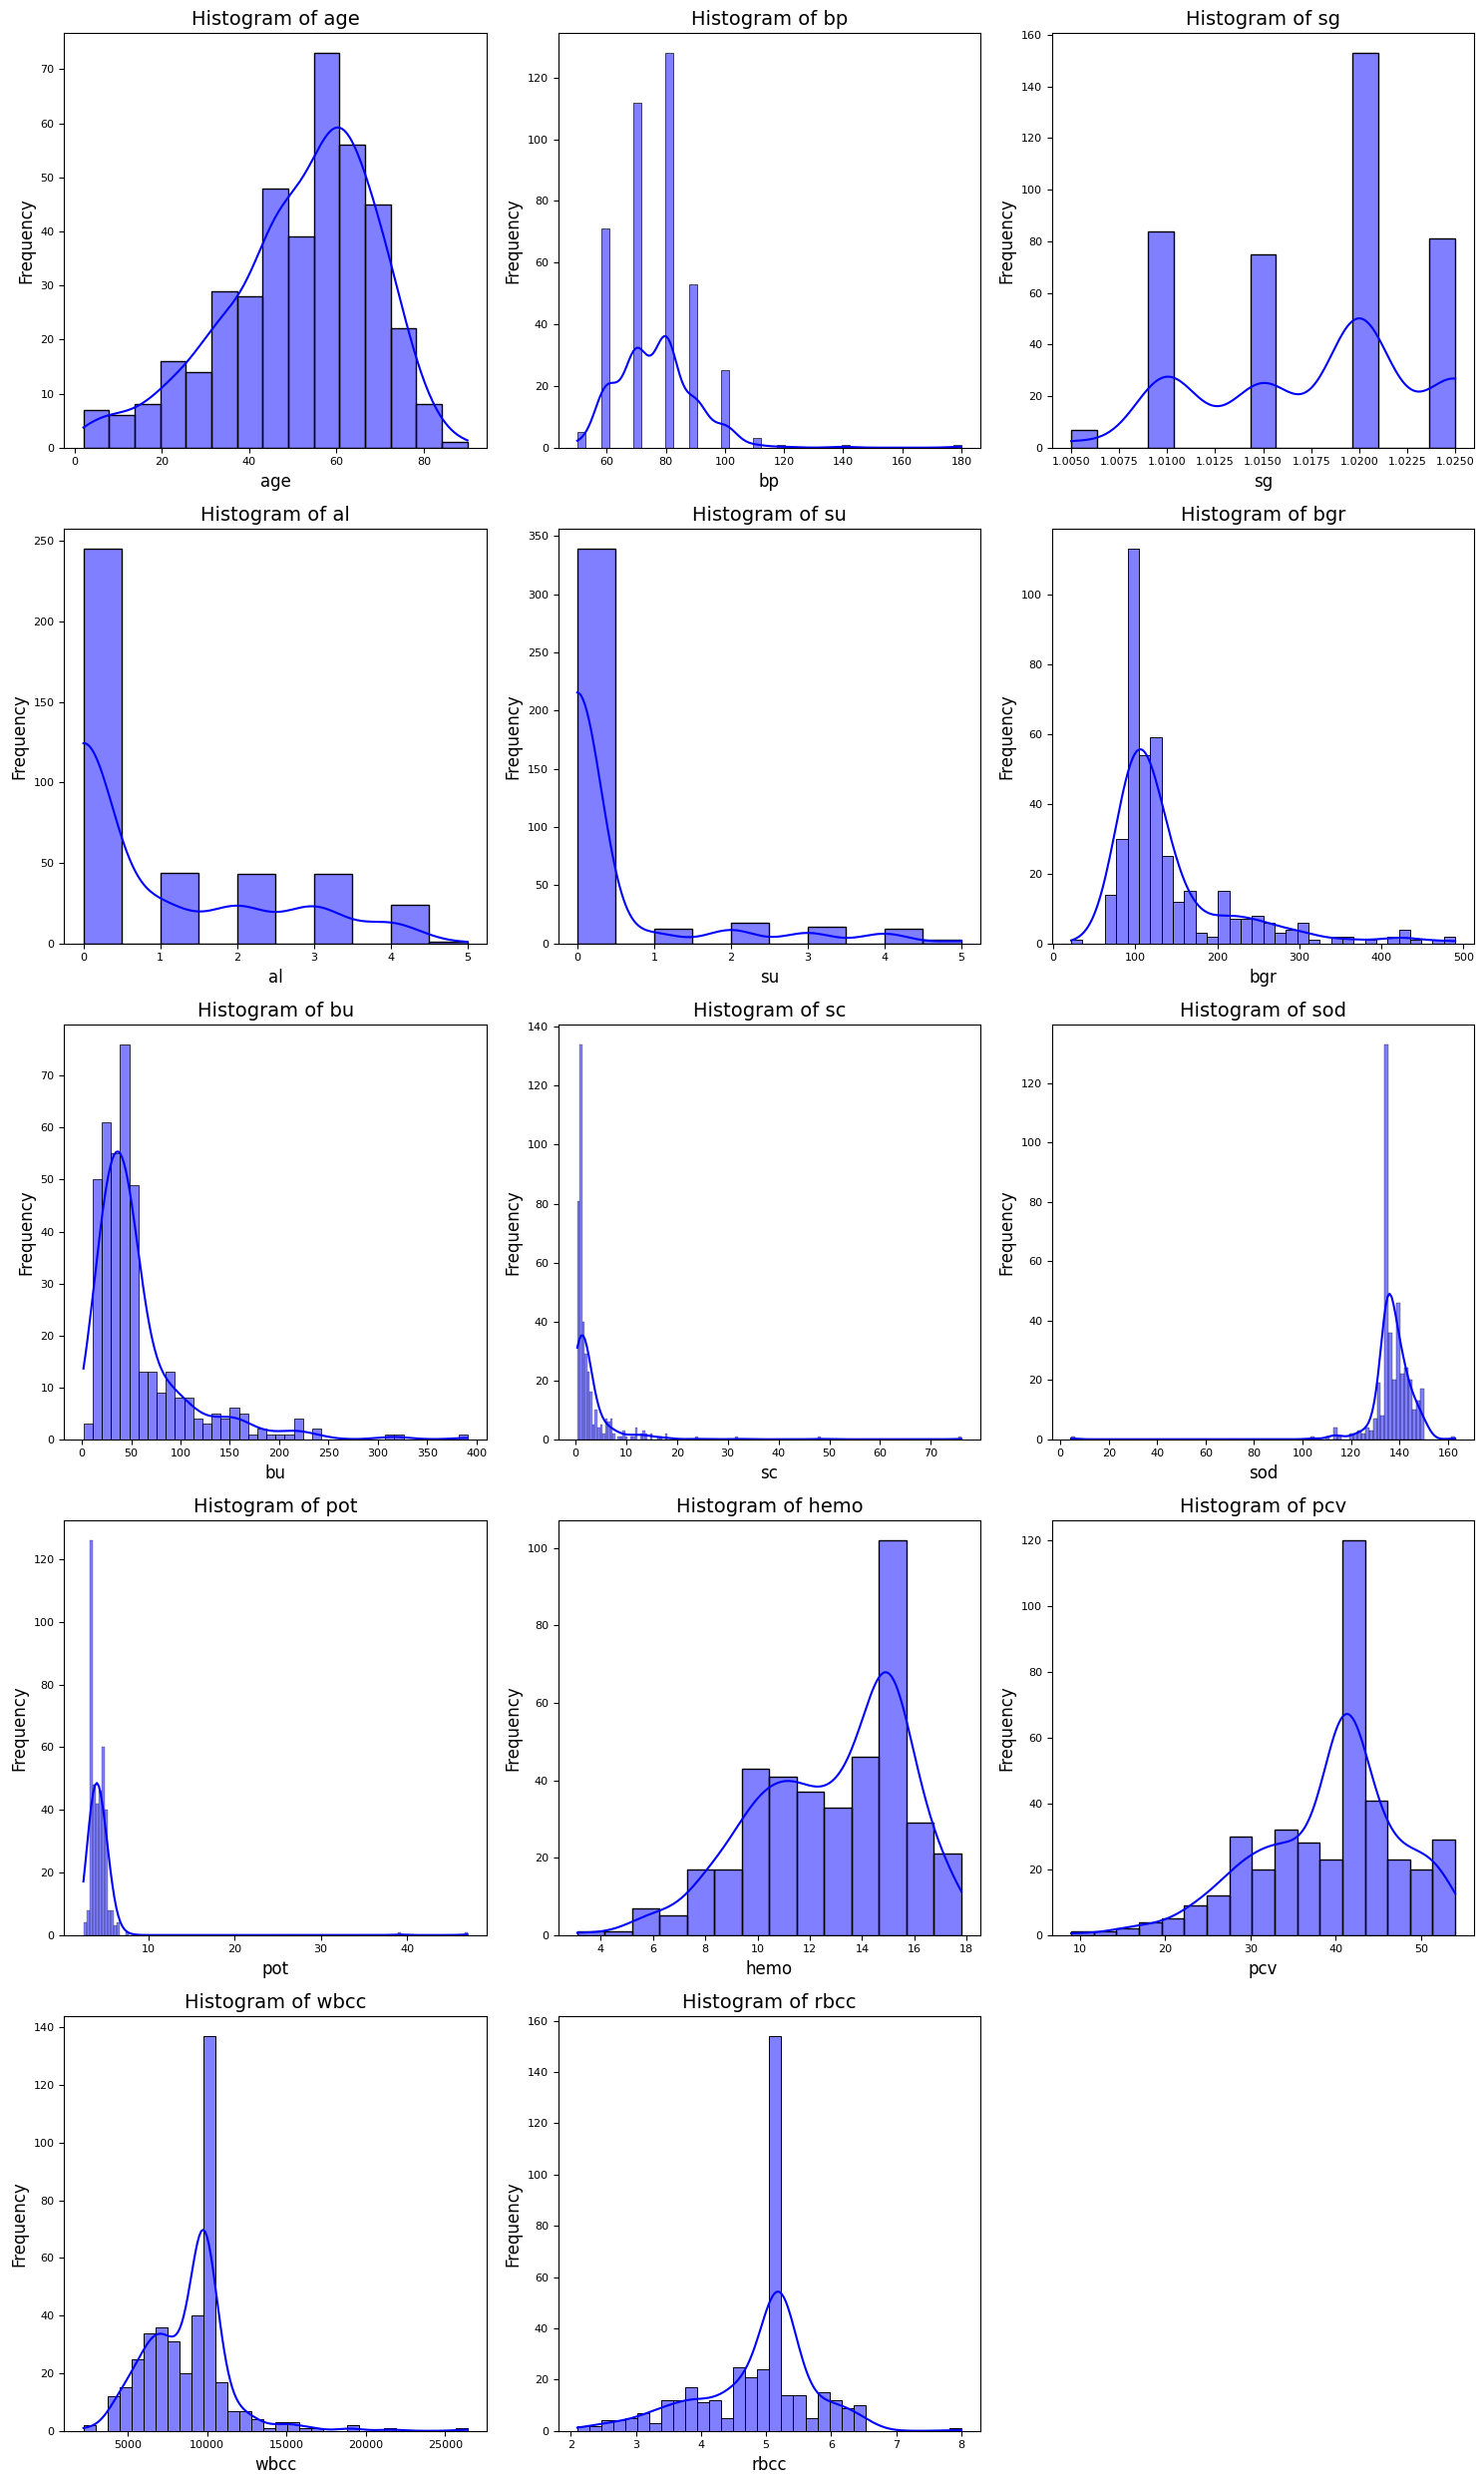

In [ ]:
# Menentukan ukuran figure untuk semua plot
num_cols_count = len(num_cols)
num_grids = 3  # Jumlah kolom grid yang diinginkan
num_rows = (num_cols_count // num_grids) + (num_cols_count % num_grids > 0)  # Menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(15, num_rows * 5))  # Menyesuaikan tinggi figure dengan jumlah baris

# Looping untuk setiap kolom numerik
for i, col in enumerate(num_cols):
    # Plot histogram untuk distribusi
    plt.subplot(num_rows, num_grids, i + 1)  # Mengatur posisi subplot
    sns.histplot(df_clean[col], kde=True, color="blue")
    plt.title(f'Histogram of {col}', fontsize=14)  # Mengatur ukuran font judul
    plt.xlabel(col, fontsize=12)  # Mengatur ukuran font sumbu x
    plt.ylabel('Frequency', fontsize=12)  # Mengatur ukuran font sumbu y
    plt.xticks(fontsize=8)  # Ukuran font untuk label sumbu x
    plt.yticks(fontsize=8)  # Ukuran font untuk label sumbu y

plt.tight_layout()
plt.show()

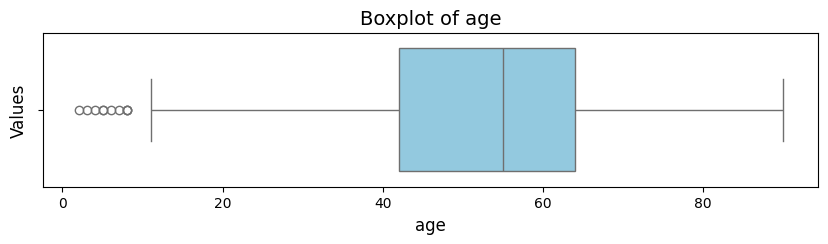

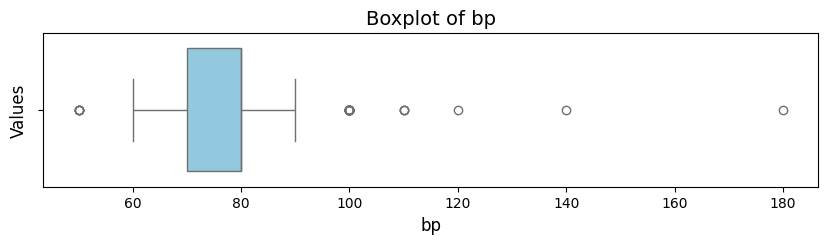

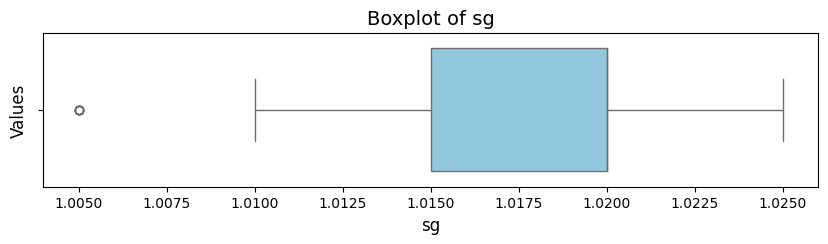

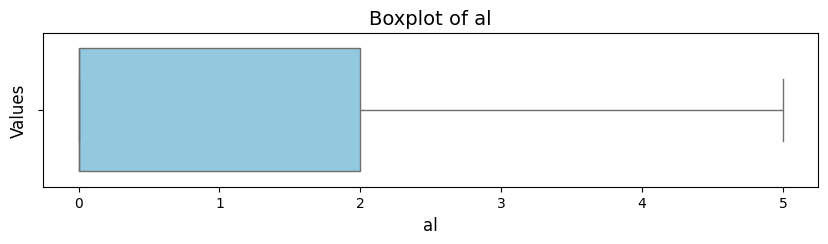

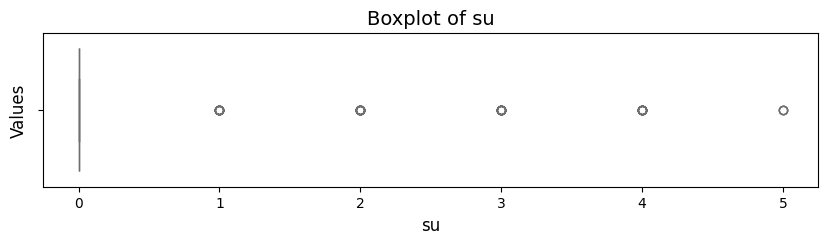

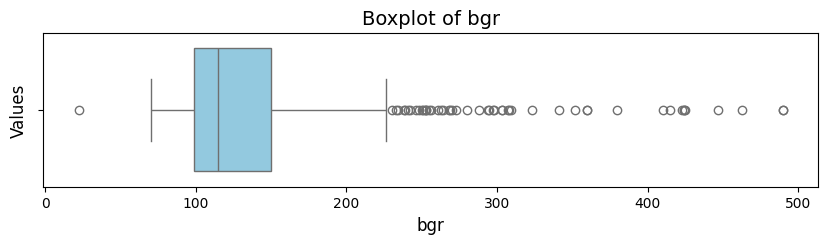

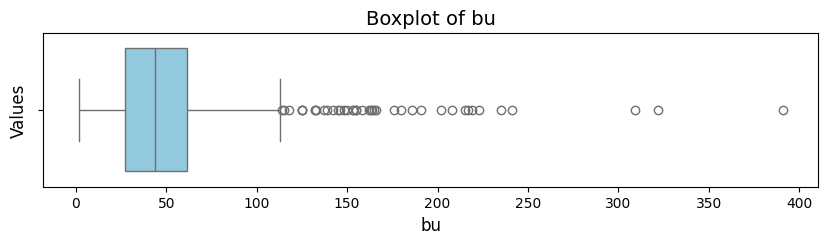

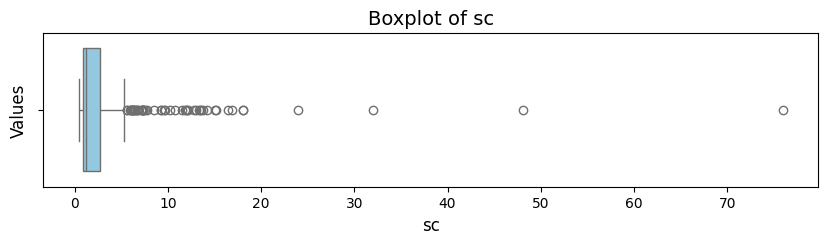

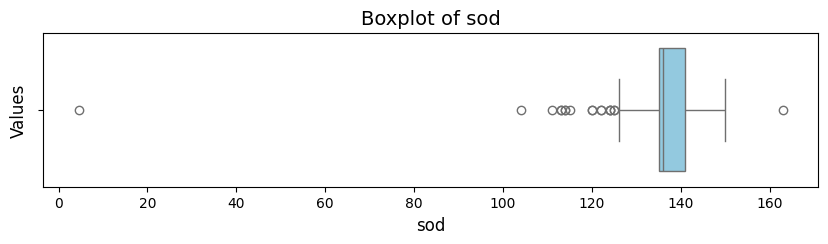

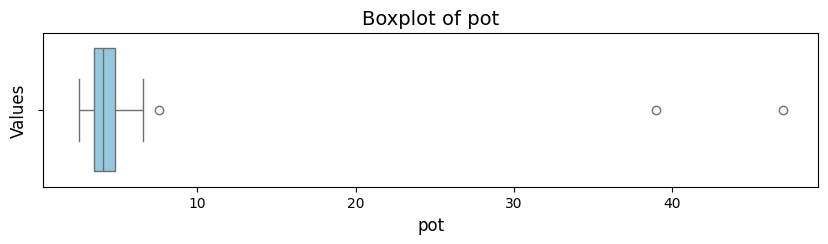

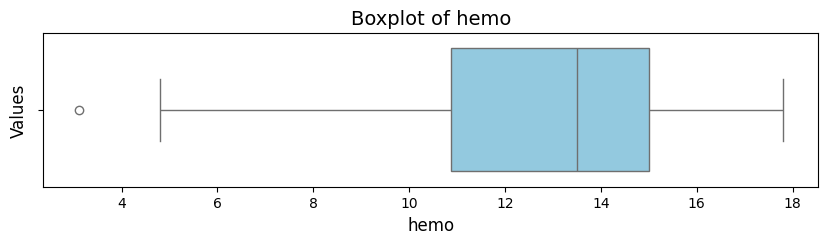

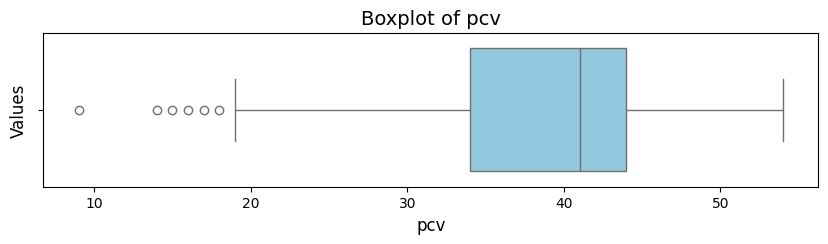

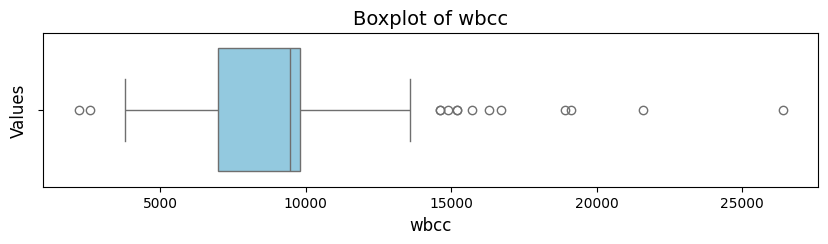

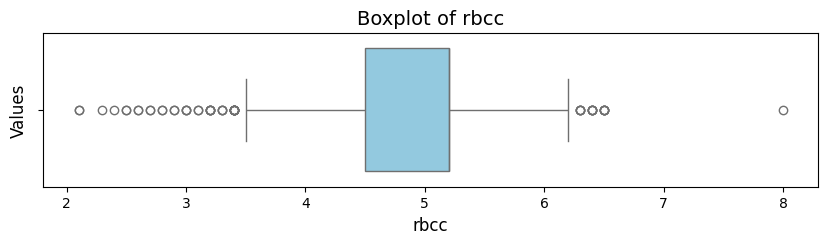

In [ ]:
for col in num_cols:
    # Menentukan ukuran figure untuk setiap plot
    plt.figure(figsize=(10, 2))  # Menentukan ukuran figure di dalam loop

    # Plot boxplot untuk distribusi
    sns.boxplot(data=df_clean, x=col, color="skyblue")
    plt.title(f'Boxplot of {col}', fontsize=14)  # Mengatur ukuran font judul
    plt.xlabel(col, fontsize=12)  # Mengatur ukuran font sumbu x
    plt.ylabel('Values', fontsize=12)  # Mengatur ukuran font sumbu y
    plt.xticks(fontsize=10)  # Mengatur ukuran font label pada sumbu x
    plt.yticks(fontsize=10)  # Mengatur ukuran font label pada sumbu y

    # Menampilkan grafik
    plt.show()

#### **Label Encoding**

In [ ]:
encode_data = df_clean.apply(preprocessing.LabelEncoder().fit_transform)
encode_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,40,3,3,1,0,1,1,0,0,48,...,31,35,30,1,1,0,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,25,19,30,0,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,18,33,30,0,1,0,1,0,1,0
3,40,2,0,4,0,1,0,1,0,44,...,19,25,17,1,0,0,1,1,1,0
4,43,3,1,2,0,1,1,0,0,33,...,22,31,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,34,25,27,0,0,0,0,0,0,1
396,34,2,4,0,0,1,1,0,0,3,...,41,35,40,0,0,0,0,0,0,1
397,8,3,3,0,0,1,1,0,0,27,...,36,24,32,0,0,0,0,0,0,1
398,11,1,4,0,0,1,1,0,0,41,...,38,30,37,0,0,0,0,0,0,1


di sini mengubah data kategorikal menjadi bentuk numerik dengan menggunakan Label Encoding. di mana nilai-nilai kategorikal diubah menjadi bentuk numerik.

#### **Heatmap**

<Axes: >

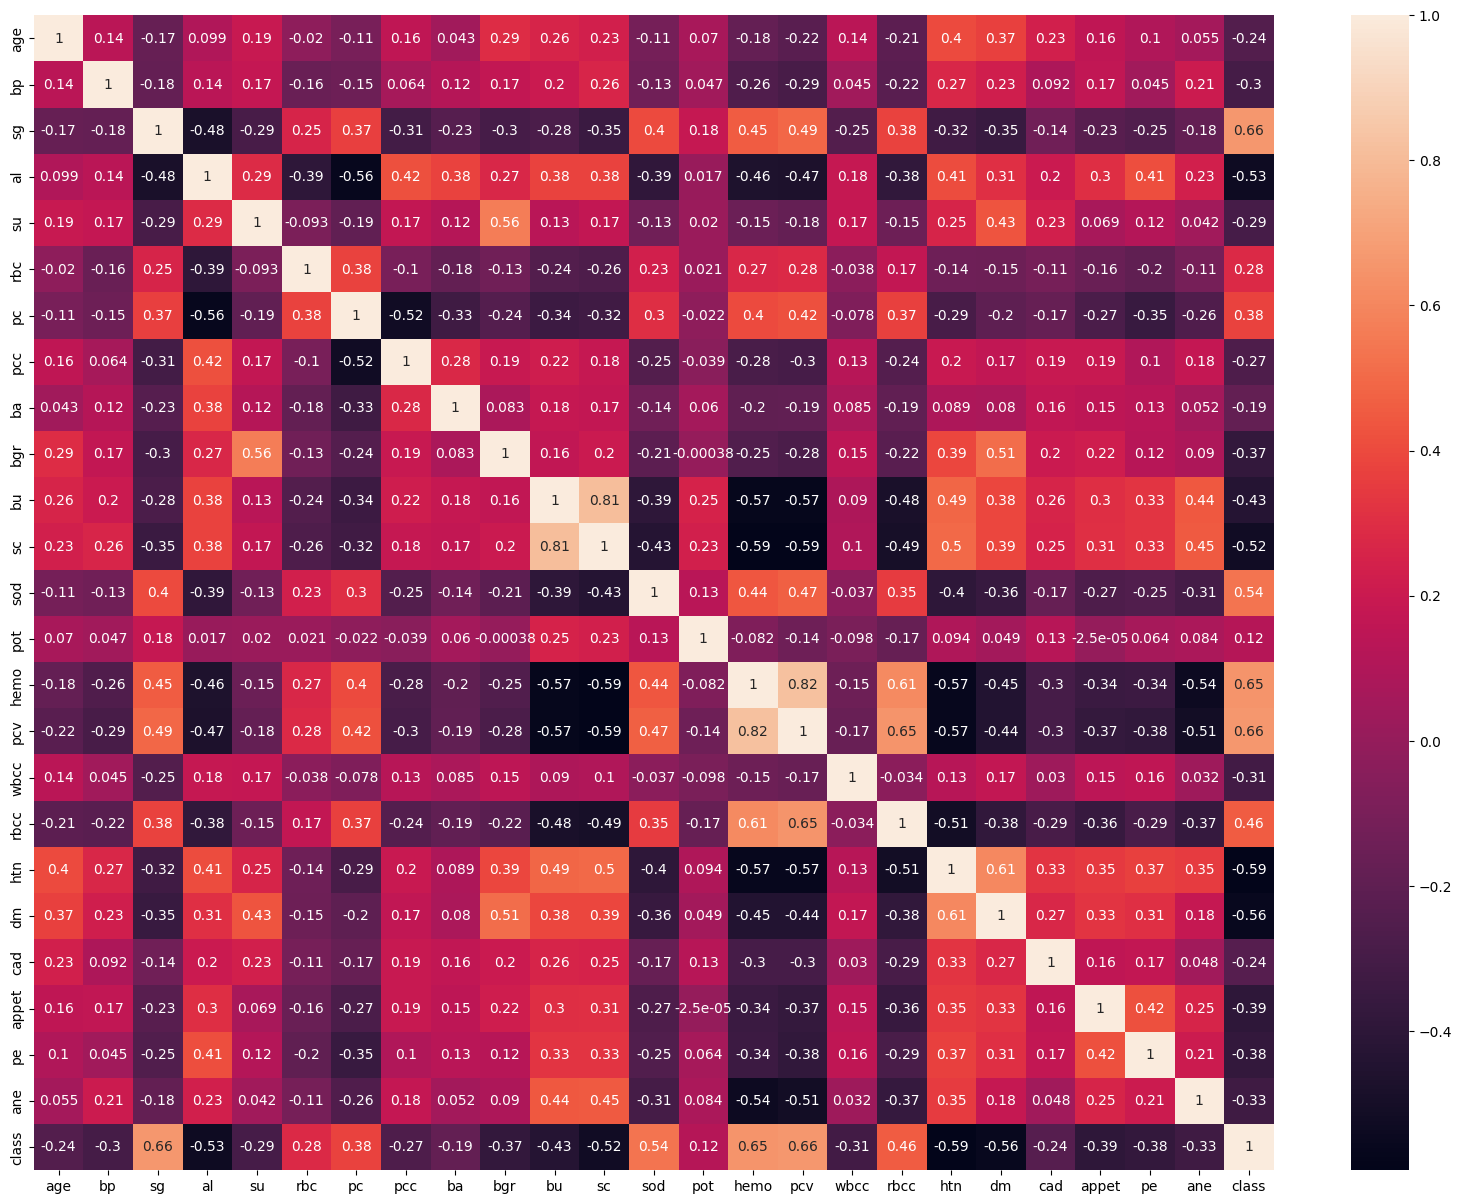

In [ ]:
plt.figure(figsize=(20,15))
corr = encode_data.corr()
sns.heatmap(corr, annot = True)

heatmap ini berguna untuk visualisasi data dalam bentuk matriks yang menampilkan data dalam format grid berwarna. di mana setiap sel dalam heatmap merepresentasikan nilai dari suatu pasangan data atau hubungan antara dua variabel.

#### **Splitting features and target**

In [ ]:
X = encode_data.drop(['class'], axis=1)
y = encode_data['class']
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,40,3,3,1,0,1,1,0,0,48,...,90,31,35,30,1,1,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,49,25,19,30,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,32,18,33,30,0,1,0,1,0,1
3,40,2,0,4,0,1,0,1,0,44,...,48,19,25,17,1,0,0,1,1,1
4,43,3,1,2,0,1,1,0,0,33,...,52,22,31,24,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,93,34,25,27,0,0,0,0,0,0
396,34,2,4,0,0,1,1,0,0,3,...,101,41,35,40,0,0,0,0,0,0
397,8,3,3,0,0,1,1,0,0,27,...,94,36,24,32,0,0,0,0,0,0
398,11,1,4,0,0,1,1,0,0,41,...,78,38,30,37,0,0,0,0,0,0


di sini saya membagi dataset menjadi feature dan target. di mana feature (X) merupakan 24 kolom pertama dan targetnya (y) adalah kolom class.

In [ ]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


#### **Handle Imbalanced Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [ ]:
print(Counter(y))

Counter({0: 250, 1: 150})


Output dari Counter({0: 250, 1: 150}) menunjukkan distribusi kelas dalam variabel target (label) di mana<br>
* 0: 250<br>
Ini berarti bahwa ada 250 contoh dari kelas 0 dalam dataset.
* 1: 150<br>
Ini berarti bahwa ada 150 contoh dari kelas 1 dalam dataset.<br>

dalam hal ini kelas 0 adalah kelas mayoritas karena memiliki jumlah contoh yang lebih banyak (250) dibandingkan kelas 1 (150). sehingga dataset ini menunjukkan ketidakseimbangan, dengan kelas 0 lebih dominan.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Lakukan oversampling pada X (features) dan y (target)
X_ROS, y_ROS = smote.fit_resample(X, y)

# Tampilkan distribusi kelas sebelum dan sesudah oversampling
from collections import Counter
print("Distribusi sebelum oversampling:", Counter(y))
print("Distribusi setelah oversampling:", Counter(y_ROS))

Distribusi sebelum oversampling: Counter({0: 250, 1: 150})
Distribusi setelah oversampling: Counter({0: 250, 1: 250})


untuk menghandle imbalance data di sisni menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique). di mana teknik ini menambah data pada kelas minoritas dengan menghasilkan data sintetis. sehingga data pada kedua kelas menjadi seimbang. yang mana data sebelum dilakukan oversampling adalah ({0: 250, 1: 150}) dan setelah oversampling data jadi seimbang yaitu ({0: 250, 1: 250})

#### **Normalisasi Data**

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_ROS)

print("Bentuk data fitur setelah normalisasi:", X_scaled.shape)
print(pd.DataFrame(X_scaled).head())

# Update y dengan y yang telah di-oversample
y = y_ROS

Bentuk data fitur setelah normalisasi: (500, 24)
         0         1    2    3    4    5    6    7    8         9   ...  \
0  0.066667 -0.333333  0.5 -0.6 -1.0  1.0  1.0 -1.0 -1.0 -0.337931  ...   
1 -0.866667 -1.000000  0.5  0.6 -1.0  1.0  1.0 -1.0 -1.0 -0.641379  ...   
2  0.440000 -0.333333 -0.5 -0.2  0.2  1.0  1.0 -1.0 -1.0  0.931034  ...   
3  0.066667 -0.555556 -1.0  0.6 -1.0  1.0 -1.0  1.0 -1.0 -0.393103  ...   
4  0.146667 -0.333333 -0.5 -0.2 -1.0  1.0  1.0 -1.0 -1.0 -0.544828  ...   

         14        15        16        17   18   19   20   21   22   23  
0  0.578947  0.512195 -0.204545  0.363636  1.0  1.0 -1.0 -1.0 -1.0 -1.0  
1 -0.140351  0.219512 -0.568182  0.363636 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2 -0.438596 -0.121951 -0.250000  0.363636 -1.0  1.0 -1.0  1.0 -1.0  1.0  
3 -0.157895 -0.073171 -0.431818 -0.227273  1.0 -1.0 -1.0  1.0  1.0  1.0  
4 -0.087719  0.073171 -0.295455  0.090909 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[5 rows x 24 columns]


di sini menggunakan MinMaxScaler untuk melakukan normalisasi data pada fitur-fitur yang telah di-resample dengan SMOTE. Normalisasi membantu memastikan bahwa semua fitur berada pada skala yang sama, sehingga model machine learning tidak bias terhadap fitur dengan skala besar. normalisasi ini memastikan fitu-fitu dalam data nilainya berada dalam rentang -1 hingga 1.

### **LSTM (Long Short-Term Memory)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

#### **Reshape Dataset**







In [ ]:
# Reshape data untuk LSTM
X_lstm = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

di sini dilakukan reshape pada data fitur yang telah dinormalisasi agar sesuai dengan format input yang dibutuhkan oleh model LSTM (Long Short-Term Memory).

#### **Split Dataset**







In [ ]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

di sini saya membagi data menjadi train dan test, dengan 20% data akan digunakan sebagai test set, dan 80% sisanya akan digunakan sebagai training set.

#### **Building Model LSTM**

In [ ]:
def train_lstm_model(X_train, y_train, epochs, batch_size):
    model= Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(64))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Ubah verbose menjadi 1 untuk menampilkan progress training
    history_lstm = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

    return model, history_lstm

di sini saya membangun model LSTM dengan menggunakan dua lapisan LSTM dengan 64 unit, lapisan Dense dengan 128 unit dan aktivasi ReLU, diikuti oleh lapisan Dropout dengan rasio 50% untuk mengurangi overfitting. lalu lapisan keluaran Dense dengan 1 unit dan aktivasi sigmoid digunakan untuk menghasilkan probabilitas dalam kasus klasifikasi biner. Model ini dikompilasi menggunakan optimizer Adam dan loss function binary crossentropy, serta diukur dengan metrik accuracy.

#### **Training Model LSTM**

In [ ]:
epochs = 50
batch_size = 32
model_lstm, history_lstm = train_lstm_model(X_train_lstm, y_train_lstm, epochs, batch_size)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6146 - loss: 0.6836 - val_accuracy: 0.7625 - val_loss: 0.6403
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6570 - loss: 0.6500 - val_accuracy: 0.8375 - val_loss: 0.5665
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8118 - loss: 0.5643 - val_accuracy: 0.8750 - val_loss: 0.4609
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8605 - loss: 0.4328 - val_accuracy: 0.9125 - val_loss: 0.3247
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8911 - loss: 0.3296 - val_accuracy: 0.9000 - val_loss: 0.2673
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8999 - loss: 0.3003 - val_accuracy: 0.9125 - val_loss: 0.2433
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9255 - loss: 0.2445 - val_accuracy: 0.9500 - val_loss: 0.2283
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9137 - loss: 0.2287 - val_accuracy: 0.9250 - v

untuk melakukan training pada model LSTM saya menggunakan 50 epochs dengan batch size sebesar 32. adapun setelah dilakukan training di dapatlah hasil yaitu accuracy: 0.9706 dan loss: 0.0999

In [ ]:
# Melakukan prediksi pada data testing
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm_classes = (y_pred_lstm > 0.5).astype(int)  # Mengubah probabilitas menjadi kelas biner

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


#### **Visualisasi LSTM**

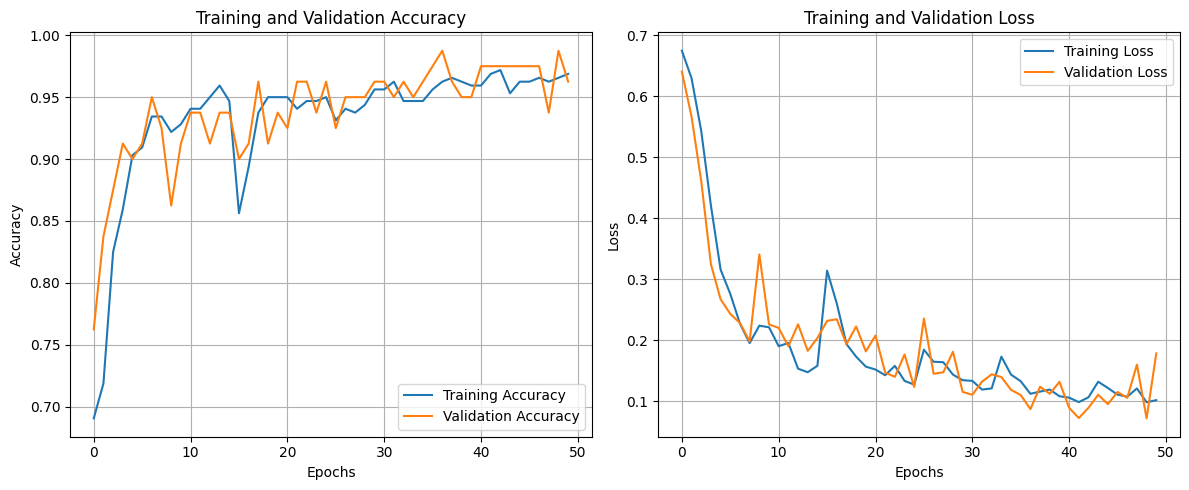

In [ ]:
# Plot Akurasi dan Loss
def plot_training_history_lstm(history_lstm):
    plt.figure(figsize=(12, 5))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
    plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_lstm.history['loss'], label='Training Loss')
    plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk menampilkan plot akurasi dan loss
plot_training_history_lstm(history_lstm)

dari plot tersebut terlihat di mana pada plot akurasi, kita akan melihat baik akurasi pelatihan maupun akurasi validasi meningkat secara bersamaan selama proses pelatihan. Selain itu, dalam plot loss, loss pelatihan dan loss validasi menurun dengan stabil. hal ini menunjukkan bahwa model tidak overfitting karena model tidak hanya belajar dari data pelatihan tetapi juga dapat menggeneralisasi pengetahuan tersebut dengan baik pada data validasi.

#### **Confusion Matrix**

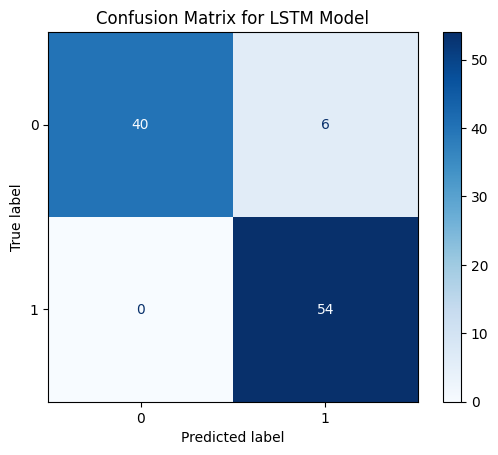

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.90      1.00      0.95        54

    accuracy                           0.94       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.94      0.94       100



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Menghitung confusion matrix
cm = confusion_matrix(y_test_lstm, y_pred_lstm_classes)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

# Menampilkan Classification Report
print("Classification Report:\n", classification_report(y_test_lstm, y_pred_lstm_classes))

Classification report ini memberikan gambaran komprehensif tentang performa model dalam mengklasifikasikan dua kelas, yaitu kelas 0 dan kelas 1. Untuk kelas 0, model mencapai **precision** sebesar 1.00, yang berarti semua prediksi positif untuk kelas ini benar, tetapi **recall** hanya 0.87, menunjukkan bahwa model hanya berhasil mendeteksi 87% dari semua contoh kelas 0 yang sebenarnya. Untuk kelas 1, model menunjukkan **precision** sebesar 0.90 dan **recall** 1.00, artinya model sangat baik dalam mendeteksi kelas ini, tetapi ada beberapa contoh yang salah terklasifikasi sebagai kelas 0. Secara keseluruhan, **accuracy** model adalah 0.94, menunjukkan bahwa 94% dari semua prediksi adalah benar. Rata-rata makro dan rata-rata berbobot untuk precision, recall, dan f1-score mendekati 0.94-0.95, yang menunjukkan kinerja yang sangat baik dari model dalam mengklasifikasikan kedua kelas, dengan sedikit kecenderungan untuk lebih baik dalam mendeteksi kelas 1 dibandingkan kelas 0.

### **CNN (Convolutional Neural Network)**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

#### **Reshape Dataset**







In [ ]:
# Reshape data untuk LSTM
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

di sini dilakukan reshape pada data fitur yang telah dinormalisasi agar sesuai dengan format input yang dibutuhkan oleh model CNN.

#### **Split Dataset**







In [ ]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

di sini saya membagi data menjadi train dan test, dengan 20% data akan digunakan sebagai test set, dan 80% sisanya akan digunakan sebagai training set.

#### **Building Model CNN**

In [ ]:
def train_cnn_model(X_train, y_train, epochs, batch_size):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Ubah verbose menjadi 1 untuk menampilkan progress training
    history_cnn = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

    return model, history_cnn


di sini saya membangun model CNN dengan menggunakanConv1D yang memiliki 64 filter dan ukuran kernel 3, menggunakan fungsi aktivasi ReLU untuk mendeteksi fitur dari data input. Setelahnya, lapisan MaxPooling1D digunakan untuk mereduksi dimensi data, diikuti oleh lapisan Conv1D kedua dengan 128 filter dan lapisan MaxPooling1D. output dari lapisan konvolusi diratakan menggunakan Flatten(), kemudian dilanjutkan dengan lapisan Dense yang memiliki 128 unit dan fungsi aktivasi ReLU. Untuk mengurangi overfitting, ada lapisan Dropout dengan rasio 50%. Akhirnya, lapisan keluaran adalah lapisan Dense dengan satu unit dan fungsi aktivasi sigmoid, yang menghasilkan probabilitas untuk klasifikasi biner.

#### **Training Model CNN**

In [ ]:
# Melatih model CNN 1D
epochs = 50
batch_size = 32
model_cnn, history_cnn = train_cnn_model(X_train_cnn, y_train_cnn, epochs, batch_size)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6678 - loss: 0.6389 - val_accuracy: 0.9500 - val_loss: 0.4633
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9443 - loss: 0.4002 - val_accuracy: 0.9500 - val_loss: 0.2294
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9489 - loss: 0.1950 - val_accuracy: 0.9750 - val_loss: 0.1275
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9702 - loss: 0.1007 - val_accuracy: 0.9875 - val_loss: 0.0869
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9869 - loss: 0.0611 - val_accuracy: 0.9875 - val_loss: 0.1030
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9967 - loss: 0.0557 - val_accuracy: 0.9750 - val_loss: 0.0672
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9914 - loss: 0.0380 - val_accuracy: 0.9875 - val_loss: 0.0632
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9984 - loss: 0.0265 - val_accuracy: 0.9875 - val_

untuk melakukan training pada model CNN saya menggunakan 50 epochs dengan batch size sebesar 32. adapun setelah dilakukan training di dapatlah hasil yaitu accuracy: 1.0000 dan loss: 0.0030

In [ ]:
# Melakukan prediksi pada data testing
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn_classes = (y_pred_cnn > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


#### **Visualisasi CNN**

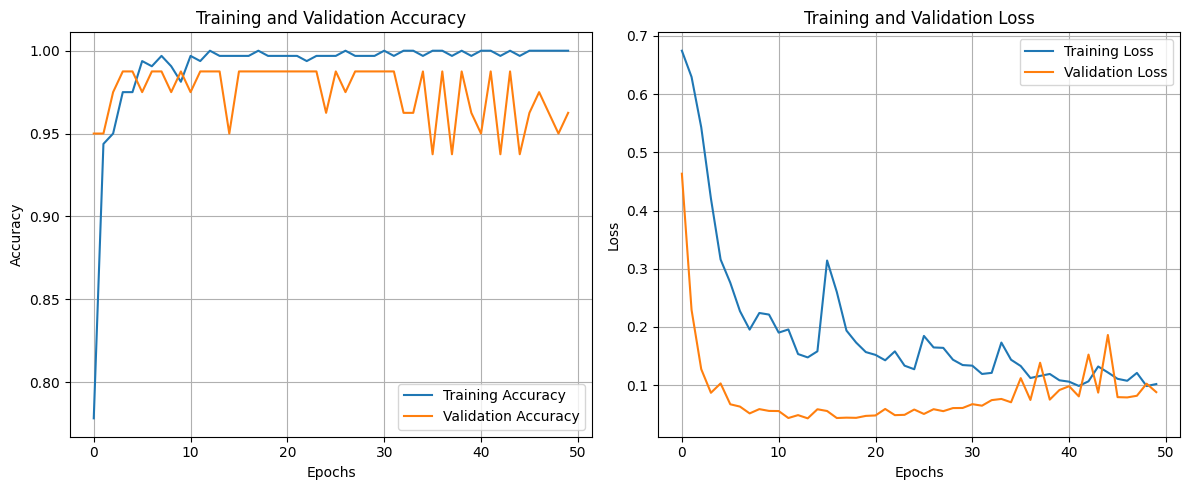

In [ ]:
# Plot Akurasi dan Loss
def plot_training_history_cnn(history_cnn):
    plt.figure(figsize=(12, 5))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
    plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_lstm.history['loss'], label='Training Loss')
    plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk menampilkan plot akurasi dan loss
plot_training_history_cnn(history_cnn)

dari plot tersebut terlihat di mana pada plot akurasi, kita melihat baik akurasi pelatihan maupun akurasi validasi meningkat secara bersamaan selama proses pelatihan. Selain itu, dalam plot loss, loss pelatihan dan loss validasi menurun dengan stabil. hal ini menunjukkan bahwa model tidak overfitting karena model tidak hanya belajar dari data pelatihan tetapi juga dapat menggeneralisasi pengetahuan tersebut dengan baik pada data validasi.

#### **Confusion Matrix**

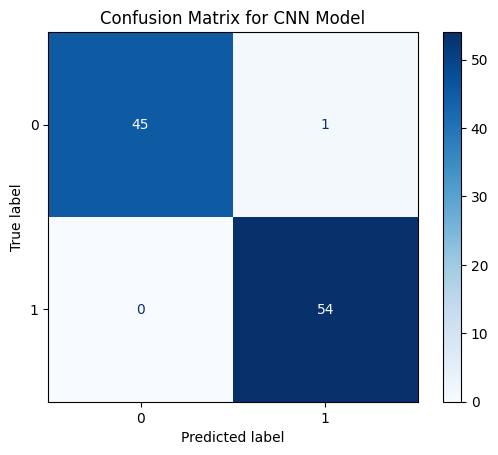

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test_cnn, y_pred_cnn_classes)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for CNN Model')
plt.show()

# Menampilkan Classification Report
print("Classification Report:\n", classification_report(y_test_cnn, y_pred_cnn_classes))

Classification report ini memberikan gambaran komprehensif tentang performa model dalam mengklasifikasikan dua kelas, yaitu kelas 0 dan kelas 1. Untuk kelas 0, model mencapai **precision** sebesar 1.00, yang berarti semua prediksi positif untuk kelas ini benar, tetapi **recall** hanya 0.98, menunjukkan bahwa model sangat efektif dalam mendeteksi contoh kelas 0. Untuk kelas 1, model menunjukkan **precision** sebesar 0.98 dan **recall** 1.00, artinya model sangat baik dalam mendeteksi kelas ini tanpa kesalahan prediksi. Secara keseluruhan, **accuracy** model adalah 0.99, menunjukkan bahwa 99% dari semua prediksi adalah benar. Rata-rata makro dan rata-rata berbobot untuk precision, recall, dan f1-score mendekati 0.99, yang menunjukkan kinerja yang sangat baik dari model dalam mengklasifikasikan kedua kelas, dengan performa yang konsisten dan seimbang untuk kedua kelas.

### **VISUALISASI HASIL**

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import recall_score, precision_score, f1_score

def plot_comparison_barchart_interactive(y_test_lstm, y_pred_lstm, y_test_cnn, y_pred_cnn, history_lstm, history_cnn):
    # Ambil akurasi tertinggi dan loss terendah dari setiap model selama pelatihan
    lstm_best_accuracy = max(history_lstm.history['accuracy'])
    lstm_lowest_loss = min(history_lstm.history['loss'])

    cnn_best_accuracy = max(history_cnn.history['accuracy'])
    cnn_lowest_loss = min(history_cnn.history['loss'])

    # Menghitung nilai-nilai evaluasi untuk LSTM
    y_pred_lstm_binary = (y_pred_lstm >= 0.5).astype(int)
    lstm_recall = recall_score(y_test_lstm, y_pred_lstm_binary)
    lstm_precision = precision_score(y_test_lstm, y_pred_lstm_binary)
    lstm_f1 = f1_score(y_test_lstm, y_pred_lstm_binary)

    # Menghitung nilai-nilai evaluasi untuk CNN
    y_pred_cnn_binary = (y_pred_cnn >= 0.5).astype(int)
    cnn_recall = recall_score(y_test_cnn, y_pred_cnn_binary)
    cnn_precision = precision_score(y_test_cnn, y_pred_cnn_binary)
    cnn_f1 = f1_score(y_test_cnn, y_pred_cnn_binary)

    # Data untuk barchart
    metrics = ['Accuracy', 'Loss', 'Recall', 'Precision', 'F1 Score']
    lstm_values = [lstm_best_accuracy, lstm_lowest_loss, lstm_recall, lstm_precision, lstm_f1]
    cnn_values = [cnn_best_accuracy, cnn_lowest_loss, cnn_recall, cnn_precision, cnn_f1]

    # Buat plot interaktif menggunakan plotly
    fig = go.Figure()

    # Bar untuk LSTM
    fig.add_trace(go.Bar(
        x=metrics,
        y=lstm_values,
        name='LSTM',
        marker_color='pink',
        textposition='none'  # Hilangkan nilai di atas bar
    ))

    # Bar untuk CNN
    fig.add_trace(go.Bar(
        x=metrics,
        y=cnn_values,
        name='CNN',
        marker_color='purple',
        textposition='none'  # Hilangkan nilai di atas bar
    ))

   # Layout
    fig.update_layout(
        title='Comparison of LSTM and CNN',
        title_x=0.5,  # Menempatkan judul di tengah
        xaxis_title='Metrics',
        yaxis_title='Scores',
        yaxis=dict(range=[0, 1.1], tickmode='linear', dtick=0.1),  # Set y-axis dengan range dari 0 hingga 1.1 dan step 0.1
        barmode='group',  # Menampilkan bar secara berkelompok
        bargap=0.15,  # Jarak antar bar dalam group
        bargroupgap=0.1,  # Jarak antar kelompok bar
        plot_bgcolor='whitesmoke',  # Mengatur background plot menjadi putih
        paper_bgcolor='white'   # Mengatur background keseluruhan menjadi putih
    )

    # Menampilkan plot interaktif
    fig.show()

# Panggil fungsi ini dengan hasil evaluasi dari kedua model
plot_comparison_barchart_interactive(y_test_lstm, y_pred_lstm, y_test_cnn, y_pred_cnn, history_lstm, history_cnn)

Perbandingan hasil menunjukkan bahwa model CNN memiliki performa yang lebih baik daripada model LSTM dalam klasifikasi biner, yang dapat dijelaskan oleh beberapa faktor. Pertama, struktur model CNN dirancang untuk menangkap pola lokal menggunakan operasi konvolusi dan pooling, sehingga lebih efektif dalam mengekstraksi fitur penting dari data satu dimensi. Kedua, CNN mungkin lebih baik dalam menghindari overfitting karena kompleksitasnya yang lebih rendah, memungkinkan generalisasi yang lebih baik pada data validasi. Selain itu, cara data diproses sebelum dimasukkan ke dalam model bisa lebih sesuai untuk CNN, meningkatkan kemampuannya dalam mendapatkan informasi dari data. Kesesuaian model juga berperan, di mana CNN lebih cocok untuk data yang memiliki struktur spatial, sementara LSTM lebih baik untuk data urutan dengan ketergantungan waktu. Terakhir, pengaturan hyperparameter yang lebih optimal untuk CNN dibandingkan LSTM juga dapat berkontribusi pada perbedaan performa ini.